# Task 1

1. Read the Breast Cancer Dataset breast-cancer-wisconsin.xlsx (from Sheet 3) and fill in the
missing values as before. Then compute the Pearson correlation between any pair of variables,
and store them in a matrix

In [1]:
import pandas as pd

df_bc = pd.read_excel('breast-cancer-wisconsin.xlsx')
df_bc.head()

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [3]:
# fill missing values with mean column values
df_bc.fillna(df_bc.mean(), inplace=True)

In [6]:
# compute pearson correlation
pears_corr = df_bc.corr(method='pearson')
pears_corr

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
code,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.098668,-0.060051,-0.052072,-0.034901,-0.080226
thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034,0.716001
uniCelS,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693,0.817904
uniCelShape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911,0.818934
marAdh,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633,0.696800
epiCelSize,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101,0.682785
bareNuc,-0.098668,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740,0.816050
blaChroma,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169,0.756616
normNuc,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336,0.712244
mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000,0.423170


2. Create a graph from the correlation matrix and visualize it with a force-directed layout. Represent
each variable as a node in the graph. Insert an edge between two variables whenever the Pearson
correlation between them exceeds the threshold ρ > 0.6.

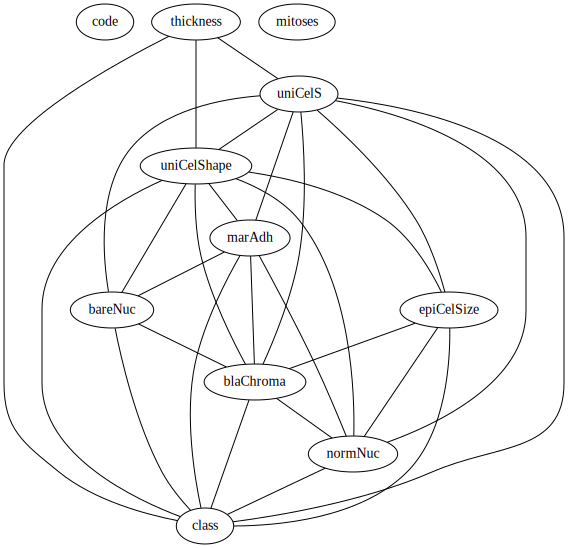

In [10]:
import graphviz as gv

graph = gv.Graph(format='svg')

# add nodes for each variable
for col in pears_corr.columns:
    graph.node(col)

# add edges for each pair of variables with correlation > 0.6
for i, col in enumerate(pears_corr.columns):
    for j in range(len(pears_corr.columns)):
        row = pears_corr.columns[j]
        if pears_corr[col][row] > 0.6 and col != row:
            graph.edge(col, row)

graph

3. Modify the visual attributes of edges to reflect the magnitude of the correlation

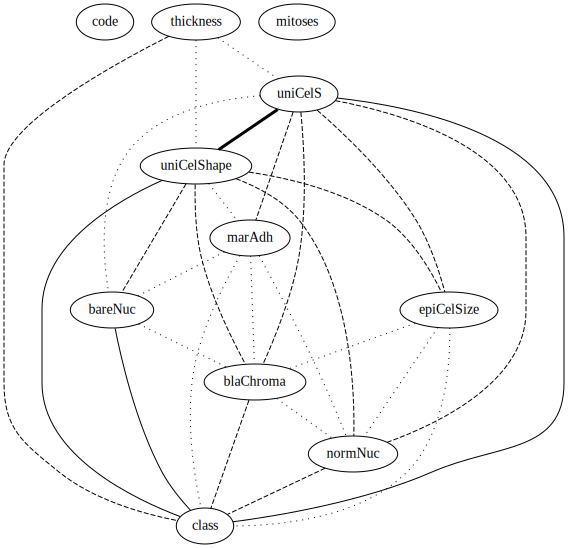

In [23]:
# set thickness of edges based on correlation
def thickness_corr(corr):
    if corr > 0.9:
        return '3'
    elif corr > 0.8:
        return '1'
    elif corr > 0.7:
        return '1'
    elif corr > 0.6:
        return '1'
    else:
        return '1'

def style_corr(corr):
    if corr > 0.9:
        return 'bold'
    elif corr > 0.8:
        return 'solid'
    elif corr > 0.7:
        return 'dashed'
    elif corr > 0.6:
        return 'dotted'
    else:
        return 'invis'

graph = gv.Graph(format='svg')

# add nodes for each variable
for col in pears_corr.columns:
    graph.node(col)

# add edges for each pair of variables with correlation > 0.6
for i, col in enumerate(pears_corr.columns):
    for j in range(i, len(pears_corr.columns)):
        row = pears_corr.columns[j]
        if pears_corr[col][row] > 0.6 and col != row:
            graph.edge(col, row, style=style_corr(pears_corr[col][row]),
                       penwidth=thickness_corr(pears_corr[col][row]))

graph

4. Produce an alternative visualization with a circular layout. Color the nodes so that there are four
sets of nodes, one color for having at least one correlation more than 0.9 to other nodes, another
for having at least a correlation 0.8 < ρmax <= 0.9, one for having a correlation 0.6 < ρmax <= 0.8
and the last one for the remaining nodes

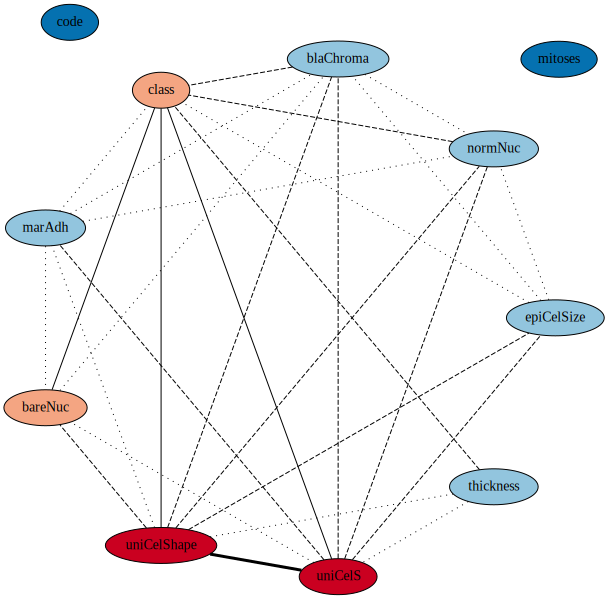

In [33]:
def get_color_corr(max_corr):
    colors = ['#ca0020','#f4a582','#92c5de','#0571b0'][::-1]
    if max_corr > 0.9:
        return colors[3]
    elif max_corr > 0.8:
        return colors[2]
    elif max_corr > 0.6:
        return colors[1]
    else:
        return colors[0]

# make visualization with circular layout
graph = gv.Graph(format='svg', engine='circo')

# add nodes for each variable
for i, col in enumerate(pears_corr.columns):
    # check 2nd max value to exclude self correlation
    max_corr = pears_corr[col].sort_values(ascending=False)[1]
    graph.node(col, style='filled', fillcolor=get_color_corr(max_corr))

# add edges for each pair of variables with correlation > 0.6
for i, col in enumerate(pears_corr.columns):
    for j in range(i, len(pears_corr.columns)):
        row = pears_corr.columns[j]
        if pears_corr[col][row] > 0.6 and col != row:
            graph.edge(col, row, style=style_corr(pears_corr[col][row]),
                       penwidth=thickness_corr(pears_corr[col][row]))

graph

5. Answer the following questions:
• At the selected threshold, which nodes are disconnected from the rest of the graph and what
do they indicate? (1P)

Nodes code and mitoses are disconnected from the rest of the graph. For node mitoses, this indicates that the variable is not correlated with any other variable. Node code cannot be correlated with any other variable because it is the identifier of the sample.

• If two nodes A and B are strongly correlated, and node C is strongly correlated with node
B, can we conclude that node C will be also strongly correlated with node A? (1P)

No, example: take A=X, B=Y, and C=X+Y. We can take X and Y to be independent, yet both A and B are correlated (positively, Pearson) with C

• Based on the visualization, which variables would you propose to predict the class? (1P)

Class is well correlated with bare_nuc, uniCelShape and uniCelS. But since uniCelShape and uniCelS are highly correlated, we can drop one of them. As a result, we get bare_nuc and uniCelShape as the best predictors of class.

# Task 2

a) The ZAME visualization tool uses a specific hierarchical data structure for storing graphs at
multiple scales. At the lowest level, four integers are stored per vertex, and either six or four per
edge. What do these integers describe? Which two are optional in case of the edges, and what is
their purpose? (3P)

They represent attributes that maintain the graph topology. For each vertex, there is a first and last edge for each of two linked edge lists for its outgoing and incoming edges. Each of these lists is in a pair of columns in the edge table for the outgoing and incoming edge lists. Two more columns of the edge table store its first and second vertex.

The doubly-linked edge lists are an optimization for fast edge removal, the back-link can be omitted to reduce memory consumption. IVTK needs to store four numbers for each vertex, and either six or four numbers for each edge. I

b) The zoomable edge table stores edges in a particular order that makes it fast to search for an edge
given its vertices. Write efficient pseudocode that returns the index within this table of an edge
connecting vertices u and v, and returns None if the table does not contain such an edge. (4P)

...

c) In the pseudocode listed in the paper’s Figure 4, some modifications are highlighted in boldface,
on lines starting with a bar. What is the purpose of these modifications? (2P)

These modifications penalize edges according to the number of times they already participate in
a path between existing pivots. This penalty encourages the algorithm to place new
pivots in regions of the graph not traversed by paths between previous pivots.

d) What is the difference between geometric zoom and detail zoom in the system? (1P)

• Geometric zoom provides information on the position and dimensions of the currently visible viewport of the data.
• Detail zoom outlines the detail level of the adjacency matrix